# Author - Anjali Jha

## Data Science and Business Analytics Intern @The Sparks Foundation

### TASK : To create a Decision Tree Classifier and visualize it graphically

In [28]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv("C:/Users/anjal/Desktop/Iris.csv")
print("Data imported successfully")
df.head()

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploring the data

In [34]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
species = {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

In [36]:
df['Species'] = df['Species'].map(species)

In [37]:
df.Species.unique()

array([0, 1, 2], dtype=int64)

In [39]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

In [40]:
X.shape, y.shape


((150, 4), (150,))

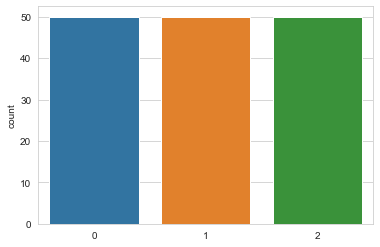

In [41]:
sns.countplot(y)
plt.show()

OBSERVATION: We can notice that the data is completely balanced Dataset.

### Splitting the data

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Building a Desicion tree classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [47]:
from sklearn import metrics

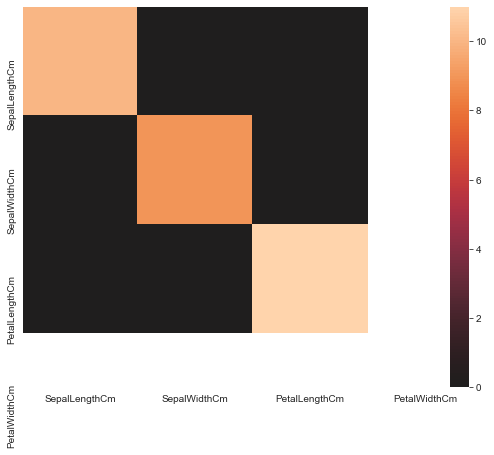

In [49]:
plt.figure(figsize = (9,7))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), xticklabels = df.iloc[:, 1:5].columns.values,  yticklabels = df.iloc[:, 1:5].columns.values, center = 0)
plt.show()

In [50]:
print(f"Precision: {metrics.precision_score(y_test, y_pred, average = 'macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average = 'macro')}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average = 'macro')}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## Visualizing the Desicion tree

In [51]:
from sklearn import tree

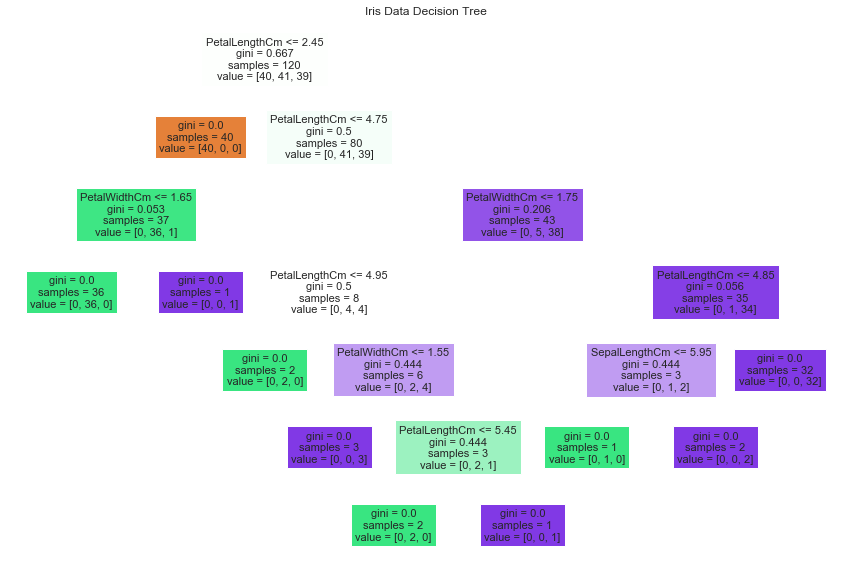

In [53]:
plt.figure(figsize = (15,10))
tree.plot_tree(model,
               feature_names = df.iloc[:, 1:5].columns.values,
               filled = True);
plt.title("Iris Data Decision Tree")
plt.show()